In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [41]:
df = pd.read_csv("../Data/diabetes.csv")
df.head()


,Patient_ID,Age,Gender,BMI,Glucose_Level,Blood_Pressure,Insulin,Physical_Activity,Family_History,Diabetes_Outcome
0,P0001,58,F,36.4,151,102,98.5,86,Yes,1
1,P0002,71,M,28.3,185,80,294.3,29,No,0
2,P0003,48,M,27.1,172,82,186.5,108,Yes,1
3,P0004,34,F,24.0,86,139,181.0,46,No,0
4,P0005,62,M,19.2,83,106,228.2,86,Yes,0


In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         500 non-null    object 
 1   Age                500 non-null    int64  
 2   Gender             500 non-null    object 
 3   BMI                500 non-null    float64
 4   Glucose_Level      500 non-null    int64  
 5   Blood_Pressure     500 non-null    int64  
 6   Insulin            500 non-null    float64
 7   Physical_Activity  500 non-null    int64  
 8   Family_History     500 non-null    object 
 9   Diabetes_Outcome   500 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 39.2+ KB


In [43]:
df.describe()

,Age,BMI,Glucose_Level,Blood_Pressure,Insulin,Physical_Activity,Diabetes_Outcome
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,50.396000,28.594200,132.898000,106.614000,159.737600,57.66400,0.542000
std,17.335982,6.288902,38.211462,29.182121,81.385927,33.91205,0.498732
min,20.000000,18.100000,70.000000,60.000000,15.400000,0.00000,0.000000
25%,36.750000,22.975000,100.000000,80.000000,89.175000,29.00000,0.000000
50%,51.000000,28.400000,131.500000,104.000000,162.450000,55.00000,1.000000
75%,65.000000,33.925000,166.000000,132.000000,230.325000,86.00000,1.000000
max,79.000000,40.000000,199.000000,159.000000,299.500000,119.00000,1.000000


In [44]:
df.isnull().sum()   

Patient_ID           0
Age                  0
Gender               0
BMI                  0
Glucose_Level        0
Blood_Pressure       0
Insulin              0
Physical_Activity    0
Family_History       0
Diabetes_Outcome     0
dtype: int64

In [45]:
df['Diabetes_Outcome'].value_counts()


Diabetes_Outcome
1    271
0    229
Name: count, dtype: int64

In [46]:
df = df.drop(columns=['Patient_ID'])


In [47]:
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])   # M/F → 0/1
df['Family_History'] = le.fit_transform(df['Family_History'])  # Yes/No → 1/0


In [48]:
X = df.drop('Diabetes_Outcome', axis=1)
y = df['Diabetes_Outcome']


In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [50]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [51]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)


In [52]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)


In [53]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [54]:
svm = SVC()
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)


In [55]:
models = {
    "Logistic Regression": lr_pred,
    "Decision Tree": dt_pred,
    "Random Forest": rf_pred,
    "SVM": svm_pred
}

for name, pred in models.items():
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))



Logistic Regression
Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        46
           1       0.90      0.96      0.93        54

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100


Decision Tree
Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.98      1.00      0.99        54

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100


Random Forest
Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        46
           1       0.98      1.00      0.99        54

    accuracy                           0.99       100
   macro avg       0.99      0.9

In [56]:
accuracy = {
    "Logistic Regression": accuracy_score(y_test, lr_pred),
    "Decision Tree": accuracy_score(y_test, dt_pred),
    "Random Forest": accuracy_score(y_test, rf_pred),
    "SVM": accuracy_score(y_test, svm_pred)
}

acc_df = pd.DataFrame.from_dict(accuracy, orient='index', columns=['Accuracy'])
acc_df.sort_values(by='Accuracy', ascending=False)


,Accuracy
Decision Tree,0.99
Random Forest,0.99
SVM,0.94
Logistic Regression,0.92


In [57]:
importances = rf.feature_importances_
features = X.columns

feature_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_df


,Feature,Importance
3,Glucose_Level,0.309318
2,BMI,0.286794
7,Family_History,0.208598
5,Insulin,0.050336
4,Blood_Pressure,0.047107
6,Physical_Activity,0.046352
0,Age,0.042357
1,Gender,0.009138


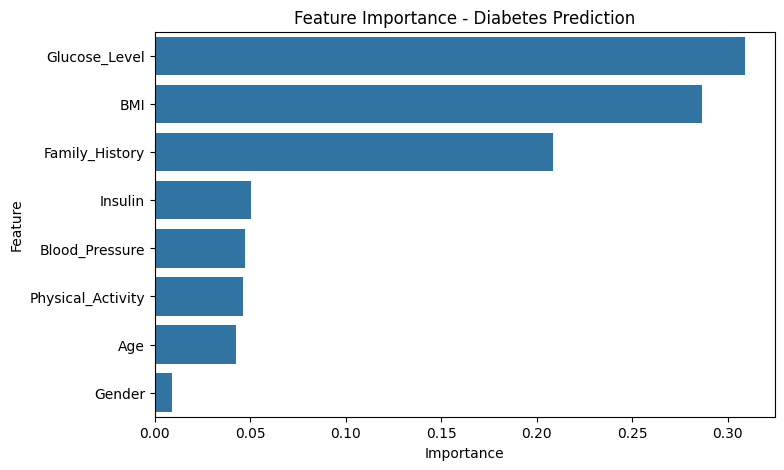

In [58]:
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importance - Diabetes Prediction")
plt.show()


In [59]:
df.head()

,Age,Gender,BMI,Glucose_Level,Blood_Pressure,Insulin,Physical_Activity,Family_History,Diabetes_Outcome
0,58,0,36.4,151,102,98.5,86,1,1
1,71,1,28.3,185,80,294.3,29,0,0
2,48,1,27.1,172,82,186.5,108,1,1
3,34,0,24.0,86,139,181.0,46,0,0
4,62,1,19.2,83,106,228.2,86,1,0


In [60]:
new_data = pd.DataFrame({
    'Age': [58],
    'Gender': [0],                 # Male=1, Female=0
    'BMI': [36.4],
    'Glucose_Level': [151],
    'Blood_Pressure': [102],
    'Insulin': [98.5],              # MUST be same name
    'Physical_Activity': [86],       # MUST be present
    'Family_History': [1]
})
new_data_scaled = scaler.transform(new_data)
rf_prediction = rf.predict(new_data)
print("Diabetes Prediction:", rf_prediction[0])


Diabetes Prediction: 1


In [61]:
final_features = list(feature_df['Feature'])
final_features


['Glucose_Level',
 'BMI',
 'Family_History',
 'Insulin',
 'Blood_Pressure',
 'Physical_Activity',
 'Age',
 'Gender']

In [66]:
import joblib

joblib.dump(rf, "../backend/ml_models/diabetes_model.pkl")
joblib.dump(scaler, "../backend/ml_models/scaler.pkl")

['../backend/ml_models/scaler.pkl']